#**Exercises 21**
#**SIFT Detecto**

By yourself, Take a color photo of an object and then place that object in another
environment. Then resize and turn it around and retake a picture of it.
Now extract and match the keypoints of these two photos twice. Once when the image is in
color and once when the image is Gray level. Which one works better? Why?

In [100]:
#import ncessery library
import cv2
import matplotlib.pyplot as plt
import numpy as np

(-0.5, 1704.5, 1279.5, -0.5)

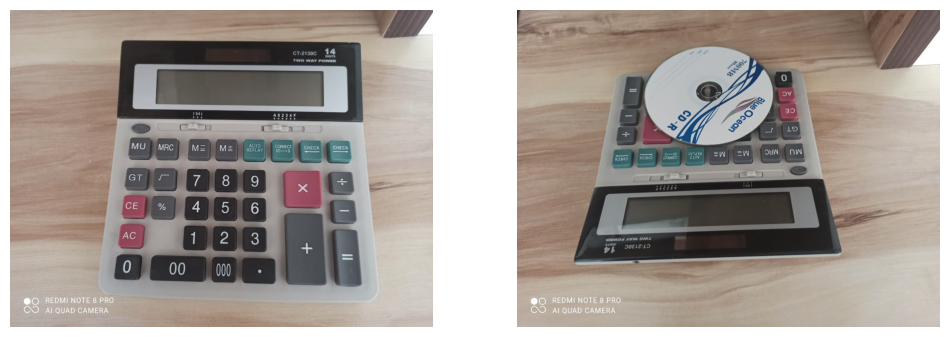

In [101]:
#Read image
img_input=cv2.imread('/content/photo4868624719.jpg')

#Reading an Image that has a value Covered
img_pattern=cv2.imread('/content/photo4868627046.jpg')

#Image Show
plt.figure(figsize=(12,8))

plt.subplot(1,2,1)
plt.imshow(img_input[...,::-1])
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(img_pattern[...,::-1])
plt.axis('off')

In [102]:
# Function Resize the Image
def resize_img(img,scale):

  lenght=int(img.shape[1]*scale/100)
  hight= int(img.shape[0]*scale/100)
  dim=(lenght, hight)
  Resize=cv2.resize(img,dim)

  return Resize

In [103]:
#Resize Image
imgInpt_resize=resize_img(img_input,60)

imgPatt_resize=resize_img(img_pattern,60)

In [104]:
#Create object SIFT
sift=cv2.SIFT_create()

#Finding key points and distributed points which is the same as histogram
key_image,des_image =sift.detectAndCompute(imgInpt_resize,mask=None)

key_pattern,des_pattern =sift.detectAndCompute(imgPatt_resize,mask=None)

#Show keyponts In Image
img_dkp1=cv2.drawKeypoints(imgInpt_resize,key_image,0,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

img2_dkp2 = cv2.drawKeypoints(imgPatt_resize,key_pattern,  0, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

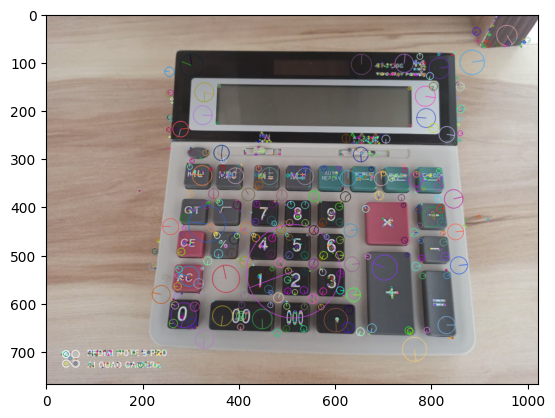

In [105]:
plt.imshow(img_dkp1[...,::-1])

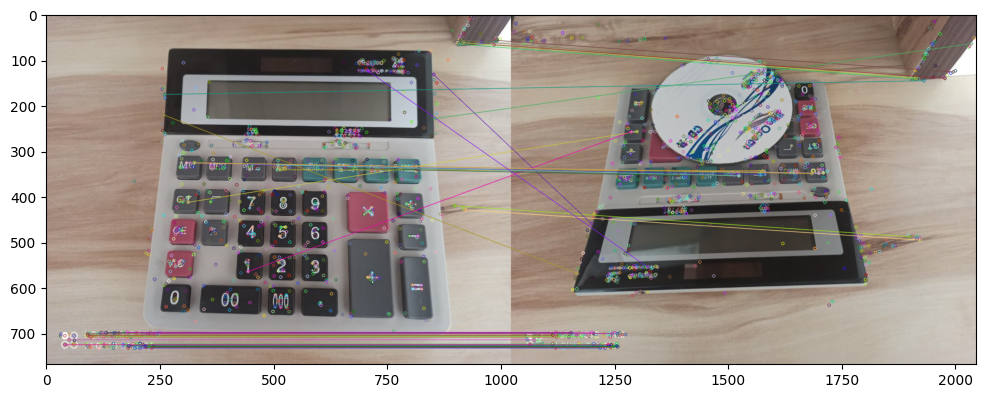

In [106]:
#Create an object to match feachers
bf=cv2.BFMatcher(cv2.NORM_L2,crossCheck=True)

maches= bf.match(des_image,des_pattern)

macher=sorted(maches,key=lambda x: x.distance)

result = cv2.drawMatches(imgInpt_resize, key_image, imgPatt_resize, key_pattern, macher[:50], None)

plt.figure(figsize=(12,8))
plt.imshow(result[...,::-1])


In [107]:
#Read Image
img_input=cv2.imread('/content/photo4868624719.jpg',0)

# Reading an Image that has a value covered
Pattern=cv2.imread('/content/photo4868627046.jpg',0)

#Resize Image
imgInpt_resize=resize_img(img_input,60)

imgPatt_resize=resize_img(Pattern,60)

In [108]:
#Create object SIFT
sift=cv2.SIFT_create()

#Finding key points and distributed points which is the same as histogram
key_image,des_image =sift.detectAndCompute(imgInpt_resize,mask=None)
key_pattern,des_pattern =sift.detectAndCompute(imgPatt_resize,mask=None)

#Show keyponts in image
img_dkp2=cv2.drawKeypoints(imgInpt_resize,key_image,0,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
img_dkp3=cv2.drawKeypoints(imgPatt_resize,key_pattern,0,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

In [109]:
bf=cv2.BFMatcher(cv2.NORM_L1,crossCheck=True)
maches=bf.match(des_image,des_pattern)

In [110]:
matches = sorted(maches, key= lambda x: x.distance)

In [111]:
result = cv2.drawMatches(imgInpt_resize, key_image, imgPatt_resize, key_pattern, matches[:50], None)

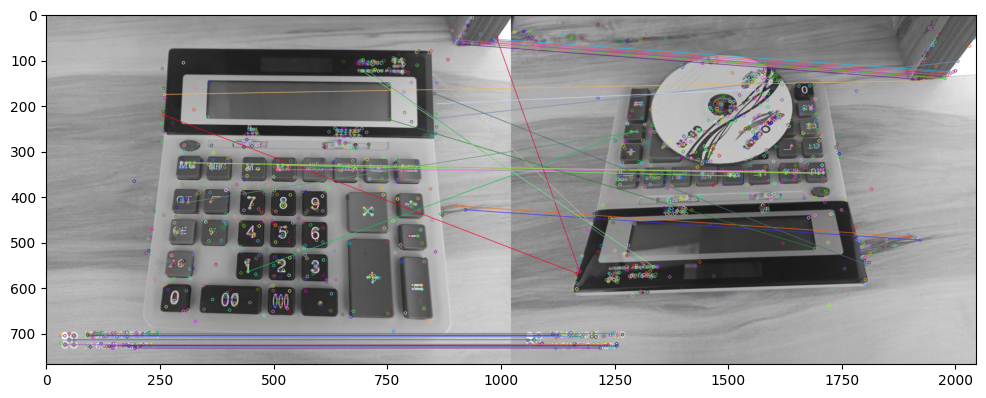

In [112]:
plt.figure(figsize=(12,8))
plt.imshow(result[...,::-1])

#According to the observed images, it seems that the number of key points does not differ between color images and gray images If the input image is colored and the pattern is gray or vice versa, the key points will be different